In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Read all genre dataframes.

In [28]:
rock = pd.read_csv("../data/rock_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
classical = pd.read_csv("../data/classical_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
jazz = pd.read_csv("../data/jazz_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
hiphop = pd.read_csv("../data/hiphop_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
punk = pd.read_csv("../data/punk_processed.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

Add genre labels to each dataframe.

In [115]:
rock['Genre'] = ['Rock'] * rock.shape[0]
classical['Genre'] = ['Classical'] * classical.shape[0]
jazz['Genre'] = ['Jazz'] * jazz.shape[0]
hiphop['Genre'] = ['Hiphop'] * hiphop.shape[0]
punk['Genre'] = ['Punk'] * punk.shape[0]

Combine all dataframes into one large dataframe

In [121]:
combined = pd.concat([rock, classical, jazz, hiphop, punk]).reset_index(drop=True)

In [129]:
combined.head()

,ID,Duration,Explicit,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Liveness,Valence,Tempo,Time Signature,Preview,Time Series,Sampling Rate,Log Mel,MFCC,Genre
0,62nQ8UZVqR2RMvkJHkcO2o,318226,False,72,0.285,0.846,2,-6.472,1,0.0438,...,0.1820,0.287,108.808,4,https://p.scdn.co/mp3-preview/c5742cc09643dc07...,[-0.08670287 -0.23489232 -0.26327035 ... -0.00...,22050,[[ 16.351944 12.501945 7.521196 ... 7....,[[-1.3252916 1.584266 -0.52864945 ... -0.2...,Rock
1,59WN2psjkt1tyaxjspN8fp,313573,True,78,0.466,0.833,7,-4.215,1,0.3040,...,0.0327,0.661,88.785,4,https://p.scdn.co/mp3-preview/af0c42e6dacc0b8b...,[-0.17826098 -0.44856685 -0.40792686 ... 0.07...,22050,[[ 16.86778 12.591039 15.987344 ... 19.579...,[[ 0.11372606 0.08615832 -0.35163376 ... -0.8...,Rock
2,3d9DChrdc6BOeFsbrZ3Is0,264306,False,81,0.559,0.345,4,-13.496,1,0.0459,...,0.1410,0.458,84.581,4,https://p.scdn.co/mp3-preview/90e41778392f27b6...,[ 0.00421489 0.00754996 -0.0057601 ... 0.12...,22050,[[ 6.358962 0.6880936 -4.500276 ... -3....,[[-0.7108547 2.326403 0.13749614 ... 1.6...,Rock
3,5jafMI8FLibnjkYTZ33m0c,257480,False,73,0.418,0.383,4,-11.782,1,0.0257,...,0.0896,0.352,87.773,4,https://p.scdn.co/mp3-preview/7cc3982631523940...,[ 0.00233941 -0.05824094 -0.08615264 ... 0.01...,22050,[[ 5.6829166 0.66769683 -9.947701 ... ...,[[-0.13802534 1.5003488 -0.9672888 ... -0.1...,Rock
4,4PtZE0h5oyPhCtPjg3NeYQ,255573,False,64,0.527,0.838,3,-6.013,1,0.0323,...,0.0700,0.721,117.454,4,https://p.scdn.co/mp3-preview/b1dd1977653f3668...,[0.00301426 0.09424075 0.3024647 ... 0.315017...,22050,[[ 8.955857 8.933042 11.030407 ... 5....,[[ 0.81574196 0.33509174 -2.310551 ... 0.9...,Rock


In [123]:
# Save combined df to 'combined.csv' file
#combined.to_csv("../data/combined.csv")

Plot mean features by genre

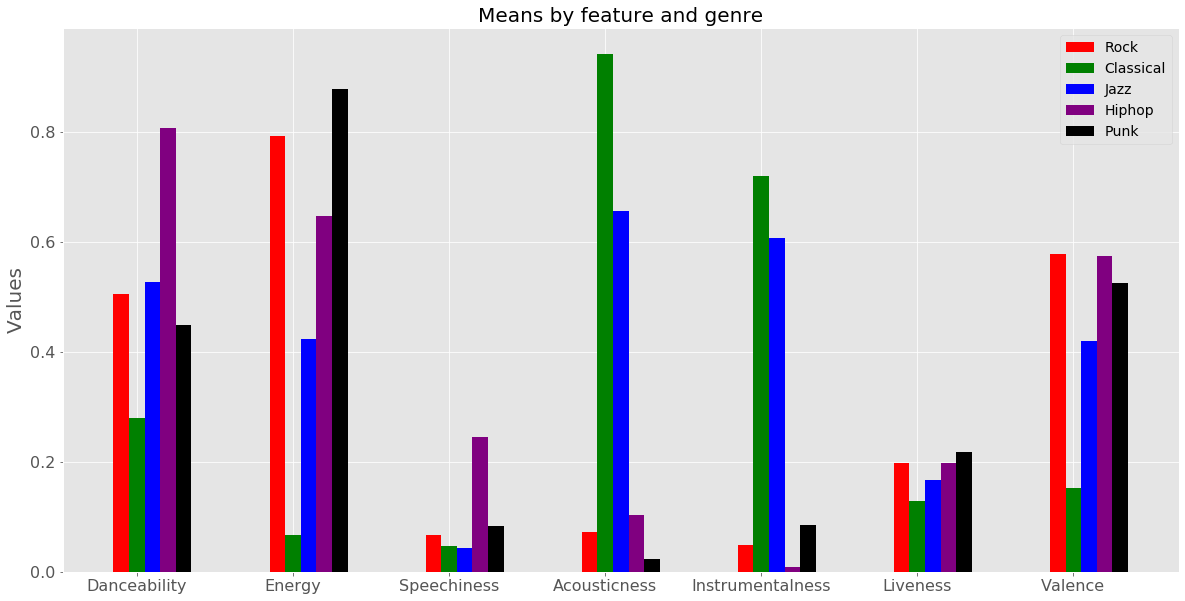

In [128]:
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
ind = np.arange(len(features))

plt.figure(figsize=(20,10))

colors = {"Rock":"red", "Classical":"green", "Jazz": "blue", "Hiphop":"purple", "Punk":"black"}
width = 0.1 
count = 1
for g in combined['Genre'].unique():
    df = combined[combined['Genre'] == g]
    df_means = [df['Danceability'].mean(), df['Energy'].mean(), df['Speechiness'].mean(), df['Acousticness'].mean(), df['Instrumentalness'].mean(), df['Liveness'].mean(), df['Valence'].mean()]
    plt.bar(ind + width * count, df_means, width, label=g, color=colors.get(g))
    count += 1


plt.ylabel('Values', fontsize=20)
plt.title('Means by feature and genre', fontsize=20)

plt.xticks(ind + width*4 / 2, features, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.show()

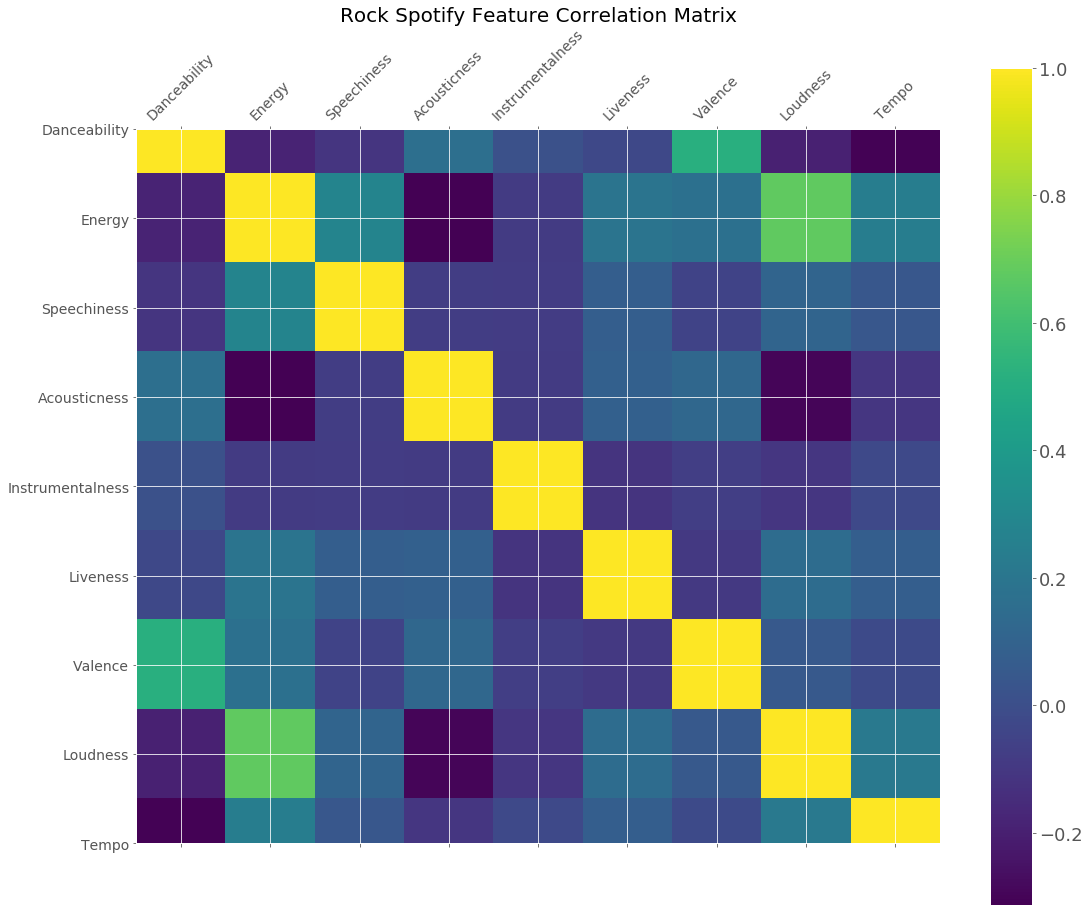

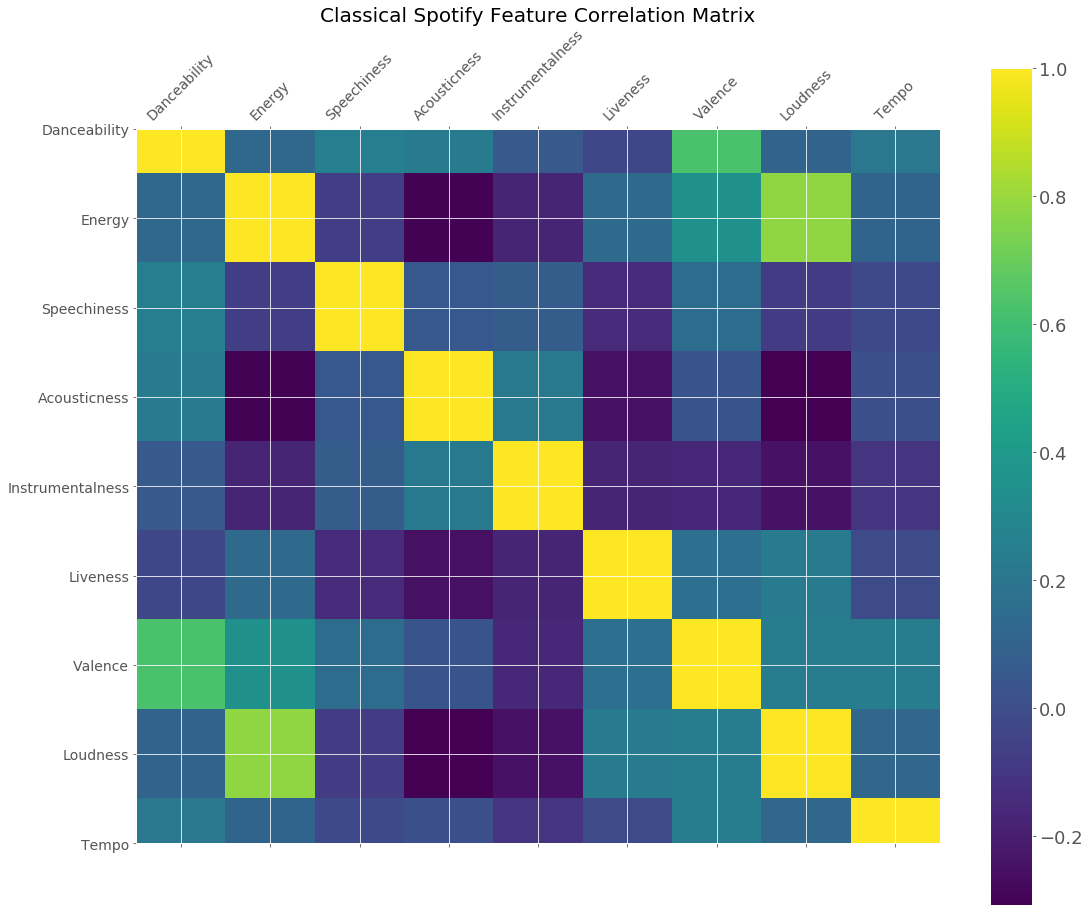

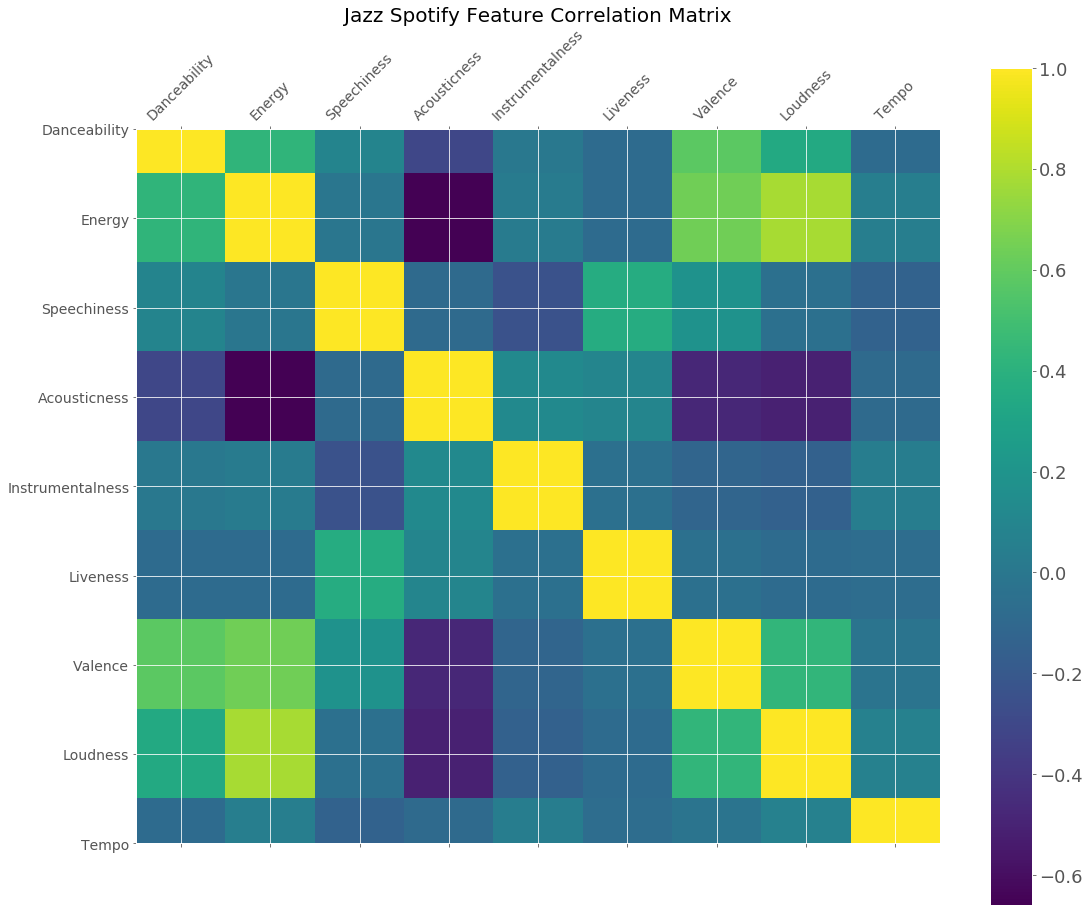

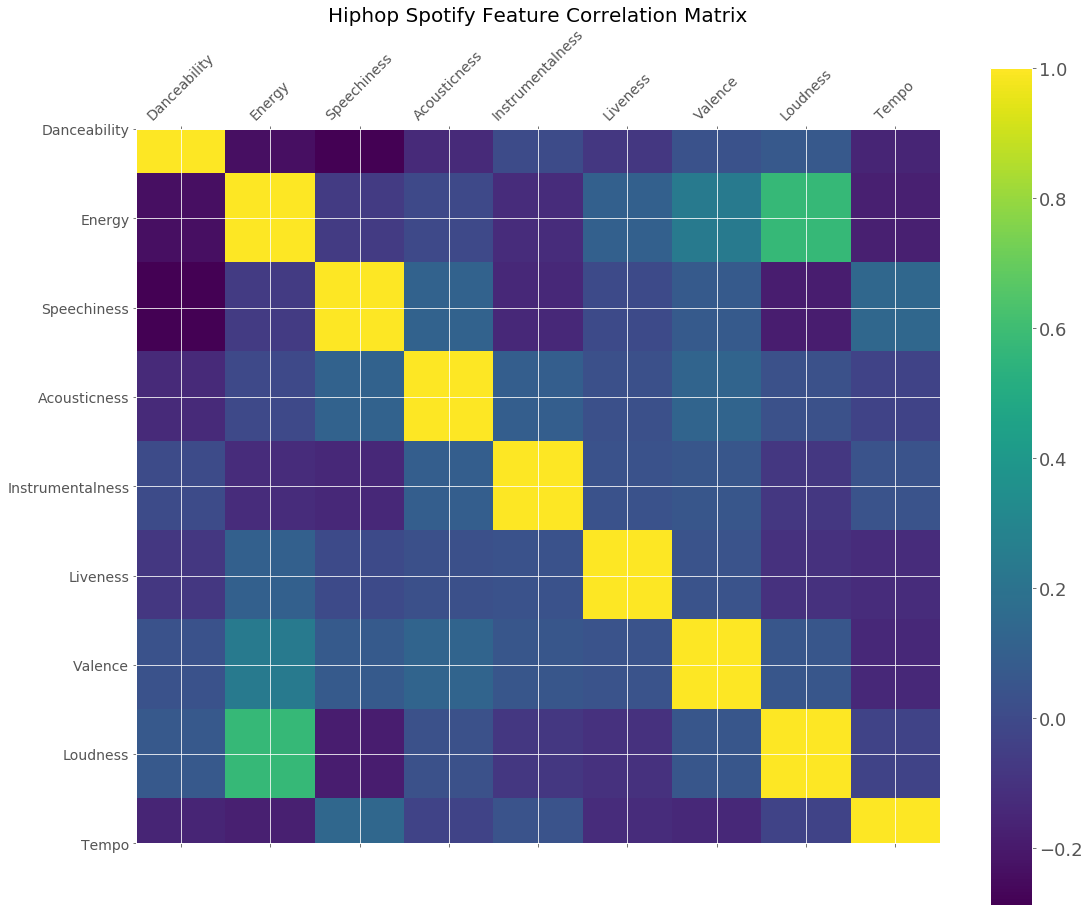

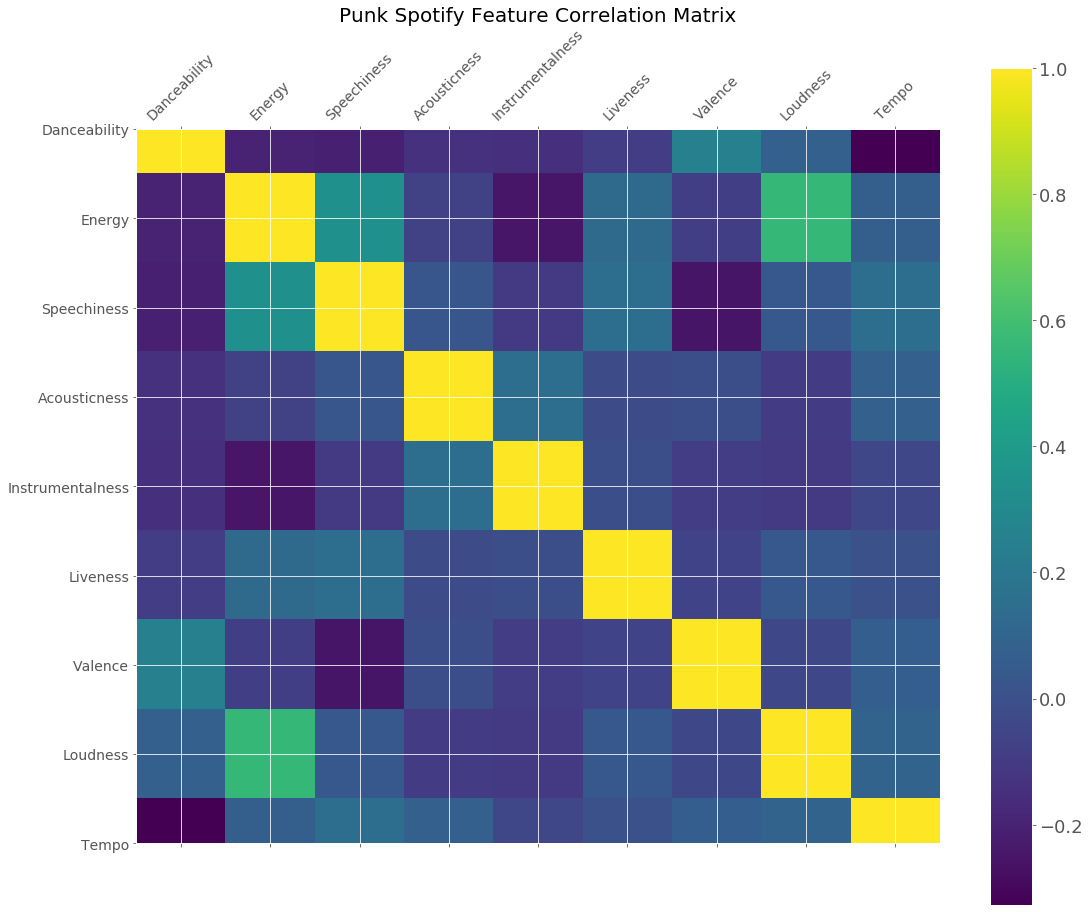

In [171]:
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']
combined_df = combined[features + ['Genre']]
for g in combined_df.Genre.unique():
    df = combined_df[combined_df['Genre'] == g].drop(['Genre'], axis=1)
    f = plt.figure(figsize=(18, 15))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=18)
    plt.title(g+' Spotify Feature Correlation Matrix\n\n\n', fontsize=20);
    plt.savefig('../results/corr_'+g.lower()+'.png')

In [165]:
combined.columns

Index(['ID', 'Duration', 'Explicit', 'Popularity', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature',
       'Preview', 'Time Series', 'Sampling Rate', 'Log Mel', 'MFCC', 'Genre'],
      dtype='object')